# Exercises
These exercises will not be marked but doing them will help you get practice and will prepare you for assignment. Each exercise should take 5-15 minutes to complete. Ask your instructor if you are stuck.

Some code to help with exercises:

In [1]:
# basic libraries you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The following is code for uploading a file to the colab.research.google 
# environment.

# library for uploading files
from google.colab import files 

def upload_files():
    # initiates the upload - follow the dialogues that appear
    uploaded = files.upload()

    # verify the upload
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

    # uploaded files need to be written to file to interact with them
    # as part of a file system
    for filename in uploaded.keys():
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

Use this block to upload files

In [ ]:
upload_files()

Saving evaluation-data.csv to evaluation-data.csv
Saving exercises-data.csv to exercises-data.csv
User uploaded file "evaluation-data.csv" with length 16876 bytes
User uploaded file "exercises-data.csv" with length 18754 bytes


# Exercise 1: Build datasets
1. Load exerises data
2. Divide into features (X) and labels (y),
3. Convert labels to 0 (B) and 1 (M)
4. Split dataset into two Training and Test (33% of the data)



In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("exercises-data.csv")
# the label column is call diagnosis. Grab just that column
label_column_name = "label"
y = df.loc[:, label_column_name]
# everything from column 2 and on is a feature
feat_column_names = list(df.columns[2:])
X = df.loc[:, feat_column_names]

# Convert labels to 1 or 0
y = y.apply(lambda v: 1 if v=="M" else 0)

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Exercise 2: Features scaling

1. Load breast cancer dataset
2. Select only columns `feature_a` and 	`feature_b`
3. Make a copy and normalize
4. Make a copy and standardize
5. (Extra) visualize all three datasets (tip: use `plt.figure()`, `plt.plot()`, and `plt.show()`)


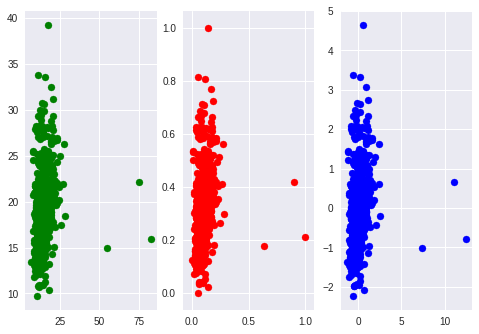

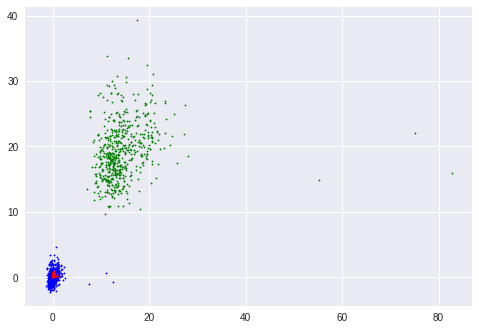

In [ ]:
df = pd.read_csv("exercises-data.csv")

df = df[['feature_a', 'feature_b']]
df_normalized = (df-df.min())/(df.max()-df.min())
df_standardized = (df-df.mean())/df.std()

# Shape of data is the same:
plt.figure()
plt.subplot(131)
plt.scatter(df.feature_a.values, df.feature_b.values, c='green')
plt.subplot(133)
plt.scatter(df_standardized.feature_a.values, df_standardized.feature_b.values, c='blue')
plt.subplot(132)
plt.scatter(df_normalized.feature_a.values, df_normalized.feature_b.values, c='red')
plt.show()
# better to view on one plot:
plt.figure()
plt.scatter(df.feature_a.values, df.feature_b.values, s=2, c='green')
plt.scatter(df_standardized.feature_a.values, df_standardized.feature_b.values, s=2, c='blue')
plt.scatter(df_normalized.feature_a.values, df_normalized.feature_b.values, s=2, c='red')
plt.show()


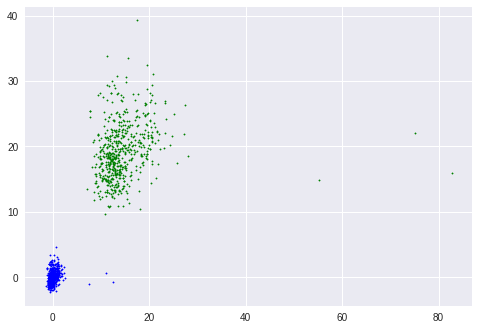

In [ ]:
# this is an alternative way to scale
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("exercises-data.csv")

df = df[['feature_a', 'feature_b']]

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
np_standardized = scaler.fit_transform(df)
df_standardized = pd.DataFrame(np_standardized, columns=['feature_a', 'feature_b'])

plt.figure()
plt.scatter(df.feature_a.values, df.feature_b.values, s=2, c='green')
plt.scatter(df_standardized.feature_a.values, df_standardized.feature_b.values, s=2, c='blue')
plt.show()

# Exercise 3: One hot encoding 

(tip: use pd.get_dummies())

1. Load data excersise data
2. Convert `feature_d`, which is nominal, to one hot encoded features
3. (Extra) Use `sklearn.preprocessing.OneHotEncoder` to do the same


In [ ]:
# pandas.get_dummies
df = pd.read_csv("exercises-data.csv")
# get one hot encoding
one_hot = pd.get_dummies(df.feature_d)
# drop old feature_d
df = df.drop('feature_d', axis=1)
# join 1 hot encoded features
df = df.join(one_hot)
df.head()

,id,label,feature_a,feature_b,feature_c,High,Low,Medium
0,842302,M,17.99,10.38,1001.0,1,0,0
1,842517,M,20.57,17.77,1326.0,0,1,0
2,84300903,M,19.69,21.25,1203.0,1,0,0
3,84348301,M,11.42,20.38,386.1,1,0,0
4,84358402,M,20.29,14.34,1297.0,1,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("exercises-data.csv")

le = LabelEncoder()
as_integers = le.fit_transform(df.feature_d).reshape(-1, 1)


enc = OneHotEncoder() 
one_hot = enc.fit_transform(as_integers)

# Exercise 4: Discretization

1. Load exercises data
2. Select only columns `feature_a` and 	`feature_b` from brest dataset
3. Discretize numerical variables into 4 nominal values using equal width
4. Discretize numerical variables into 4 nomnial values using Equal Frequency
5. Show value counts for each discretization method


In [ ]:
df = pd.read_csv("exercises-data.csv")

df_equal_width = pd.DataFrame()
df_equal_width['feature_a'] = pd.cut(df.feature_a, 4, labels=["1", "2", "3", "4"])
df_equal_width['feature_b'] = pd.cut(df.feature_b, 4, labels=["1", "2", "3", "4"])

df_equal_width.apply(pd.Series.value_counts)

,feature_a,feature_b
1,563,185
2,3,316
3,1,64
4,2,4


In [ ]:
df_equal_frequency = pd.DataFrame()
df_equal_frequency['feature_a'] = pd.qcut(df.feature_a, 4, labels=["1", "2", "3", "4"])
df_equal_frequency['feature_b'] = pd.qcut(df.feature_b, 4, labels=["1", "2", "3", "4"])

df_equal_frequency.apply(pd.Series.value_counts)

,feature_a,feature_b
1,143,143
4,142,142
3,142,142
2,142,142


# Exercise 5: Outlier removal

1. Load exercise data
2. Outliers are present in `feature_a`, detect them using 99th percentile
3. Make copy, remove instances which are outliers
4. Make copy, replace values that are outliers with a value at 99th percentile


In [ ]:
df = pd.read_csv("exercises-data.csv")

threshold = df.feature_a.quantile(.99)
df_removed = df[df.feature_a <= threshold]
df_replaced = df.copy()
df_replaced.loc[df_replaced.feature_a > threshold, 'feature_a'] = threshold

print("Original dataframe size: ", len(df), "max value:", df.feature_a.max())
print("Threshold", threshold)
print("Dataframe with removed outliers size: ", len(df_removed), "max value:",  df_removed.feature_a.max())
print("Dataframe with replaced outliers size: ", len(df_replaced), "max value:",  df_replaced.feature_a.max())

Original dataframe size:  569 max value: 82.7
Threshold 26.206800000000072
Dataframe with removed outliers size:  563 max value: 25.73
Dataframe with replaced outliers size:  569 max value: 26.206800000000072


# Exercise 6: Handle missing values 

1. Load exercise data
2. Find feature with missing values
3. replace them with average for that feature
4. Extra: Use `SimpleImputer` from `sklearn.impute`

In [2]:
from sklearn.impute import SimpleImputer
df = pd.read_csv("exercises-data.csv")
# Check for count of missing values
print(df.isnull().sum())
# or faster for just presence
print(df.isnull().any())

df_with_nulls = df.copy()
df.feature_c = df_with_nulls.feature_c.fillna(df.feature_c.mean())
# validate that missing vaues were removed
print(df.isnull().sum())

df = df_with_nulls


df.feature_c = SimpleImputer().fit_transform(df_with_nulls.loc[:, ['feature_c']])
# validate that missing vaues were removed
print(df.isnull().sum())



id            0
label         0
feature_a     0
feature_b     0
feature_c    16
feature_d     0
dtype: int64
id           False
label        False
feature_a    False
feature_b    False
feature_c     True
feature_d    False
dtype: bool
id           0
label        0
feature_a    0
feature_b    0
feature_c    0
feature_d    0
dtype: int64
id           0
label        0
feature_a    0
feature_b    0
feature_c    0
feature_d    0
dtype: int64


# Exercise 7: Features engineering

1. Load exercise data
2. Add new feautre_e that is equal `(feature_a+feature_b)/feature_c`


In [ ]:
df = pd.read_csv("exercises-data.csv")

df['feature_e'] = (df.feature_a + df.feature_b)/df.feature_c
df.head()

,id,label,feature_a,feature_b,feature_c,feature_d,feature_e
0,842302,M,17.99,10.38,1001.0,High,0.028342
1,842517,M,20.57,17.77,1326.0,Low,0.028914
2,84300903,M,19.69,21.25,1203.0,High,0.034032
3,84348301,M,11.42,20.38,386.1,High,0.082362
4,84358402,M,20.29,14.34,1297.0,High,0.026700


# Exercise 8: Evaluation metrics. 

1. Load provided evaluation data ("evaluation-data.csv"), it contains original_label, predicted_label, and prediction probability
2. Calculate Accuracy, Sensitivity, Specificity, MCC (tip: use functions in `sklearn.metrics`)
3. Calcualte AUC metric
4. (Extra) Using `roc_curve`methods generate data for ROC curve and display ROC on graph (tip: use `plt.figure()`, `plt.plot()`, and `plt.show()`)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef

df = pd.read_csv("evaluation-data.csv")

print("Accuracy:", accuracy_score(df.label, df.prediction))
print("MCC:", matthews_corrcoef(df.label, df.prediction))

cm = confusion_matrix(df.label, df.prediction)
tpr = float(cm[0][0])/np.sum(cm[0])
tnr = float(cm[1][1])/np.sum(cm[1])

print ("True Positive Rate:", tpr)
print ("True Negative Rate:", tnr)

Accuracy: 0.822
MCC: 0.6440944616271981
True Positive Rate: 0.8084677419354839
True Negative Rate: 0.8353174603174603


AUC: 0.8779321876600104


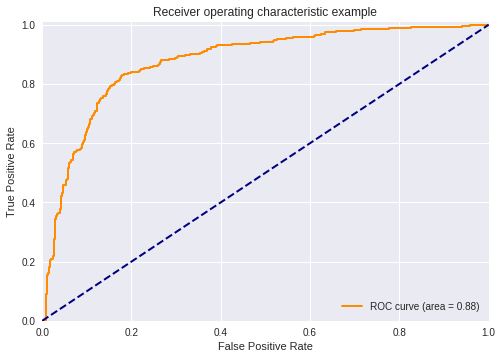

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(df.label, df.probability)
roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Exercise 9: Prepare cross validation

1. Load exercises dataset and create a training dataset (see exercise 1)
2. Use `sklearn.model_selection.StratifiedKFold` to split data into folds
3. Iterate through folds and display number of rows in training and in test set

In [ ]:
# for cross validation
from sklearn.model_selection import StratifiedKFold

df = pd.read_csv("exercises-data.csv")
# the label column is call diagnosis. Grab just that column
label_column_name = "label"
y = df.loc[:, label_column_name]
# everything from column 2 and on is a feature
feat_column_names = list(df.columns[2:-1])
X = df.loc[:, feat_column_names]

# Convert labels to 1 or 0
y = y.apply(lambda v: 1 if v=="M" else 0)

skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_indices, test_indices in skf.split(X, y):
    train_features = X.iloc[train_indices]
    train_labels = y.iloc[train_indices]

    test_features = X.iloc[test_indices]
    test_labels = y.iloc[test_indices]
    print (f"Trainign size: {len(train_features)}, Test size: {len(test_features)}")
    

Trainign size: 454, Test size: 115
Trainign size: 454, Test size: 115
Trainign size: 456, Test size: 113
Trainign size: 456, Test size: 113
Trainign size: 456, Test size: 113


# Exercise 10: Fit and Predict with Dummy Classifier

1. Copy your code from Exercise 1 to get train and test data
2. Use `sklearn.dummy.DummyClassifier` (http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
3. Call `fit` with the DummyClassifier on the training data
4. Make a prediction using `predict` with the DummyClassifier on the test data


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

df = pd.read_csv("exercises-data.csv")
# the label column is call diagnosis. Grab just that column
label_column_name = "label"
y = df.loc[:, label_column_name]
# everything from column 2 and on is a feature
feat_column_names = list(df.columns[2:-1])
X = df.loc[:, feat_column_names]

# Convert labels to 1 or 0
y = y.apply(lambda v: 1 if v=="M" else 0)

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

model = DummyClassifier()
model = model.fit(X_train, y_train)
preds = model.predict(X_test)

Train - test split with building classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("exercises-data.csv")

one_hot = pd.get_dummies(df.feature_d)
df = df.join(one_hot)
df = df.drop('feature_d', axis = 1)
df.feature_c = df.feature_c.fillna(df.feature_c.mean())


y = df.loc[:, "label"]
X = df.loc[:, list(df.columns[2:])]
y = y.apply(lambda v: 1 if v == "M" else 0)

# data cleaning

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print("MCC:", matthews_corrcoef(y_test, preds))

cm = confusion_matrix(y_test, preds)
tpr = float(cm[0][0])/np.sum(cm[0])
tnr = float(cm[1][1])/np.sum(cm[1])

print ("True Positive Rate:", tpr)
print ("True Negative Rate:", tnr)

Cross validation - real example

In [ ]:
# for cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("exercises-data.csv")

one_hot = pd.get_dummies(df.feature_d)
df = df.join(one_hot)
df = df.drop('feature_d', axis = 1)
df.feature_c = df.feature_c.fillna(df.feature_c.mean())

y = df.loc[:, "label"]
X = df.loc[:, list(df.columns[2:])]
y = y.apply(lambda v: 1 if v == "M" else 0)

skf = StratifiedKFold(n_splits=5, shuffle=True)

preds = []
labels = []

for train_indices, test_indices in skf.split(X,y):
  X_train = X.iloc[train_indices]
  X_test = X.iloc[test_indices]

  y_train = y.iloc[train_indices]
  y_test = y.iloc[test_indices]
  print (f"Trainign size: {len(X_train)}, Test size: {len(X_test)}")

  model = DecisionTreeClassifier()
  model = model.fit(X_train, y_train)
  preds.extend(model.predict(X_test))
  labels.extend(y_test)

print("Accuracy:", accuracy_score(labels, preds))
print("MCC:", matthews_corrcoef(labels, preds))

cm = confusion_matrix(labels, preds)
tpr = float(cm[0][0])/np.sum(cm[0])
tnr = float(cm[1][1])/np.sum(cm[1])

print ("True Positive Rate:", tpr)
print ("True Negative Rate:", tnr)